# Redukcja wymiarowości

## Redukcja wymiarowości

### Problem wymiarowości
Czasami mamy zbyt dużo wymiarów przez co algorytmy uczenia maszynowego mogą mieć problemy z ich fitowaniem.
Zmniejszenie liczby cech:
- przyspieszenie procesu uczenia/odpytywania
- im więcej cech tym potrzeba znacznie więcej instancji

**Łatwiejsza wizualizacja**

### Projekcja
Szczególnie dla rzadkich przestrzeni
- instancje nie są równomiernie rozmieszczone
- niektóe cechy są nieistotne
- niektóre cechy są silnie skorelowane

### Projekcja, przykład

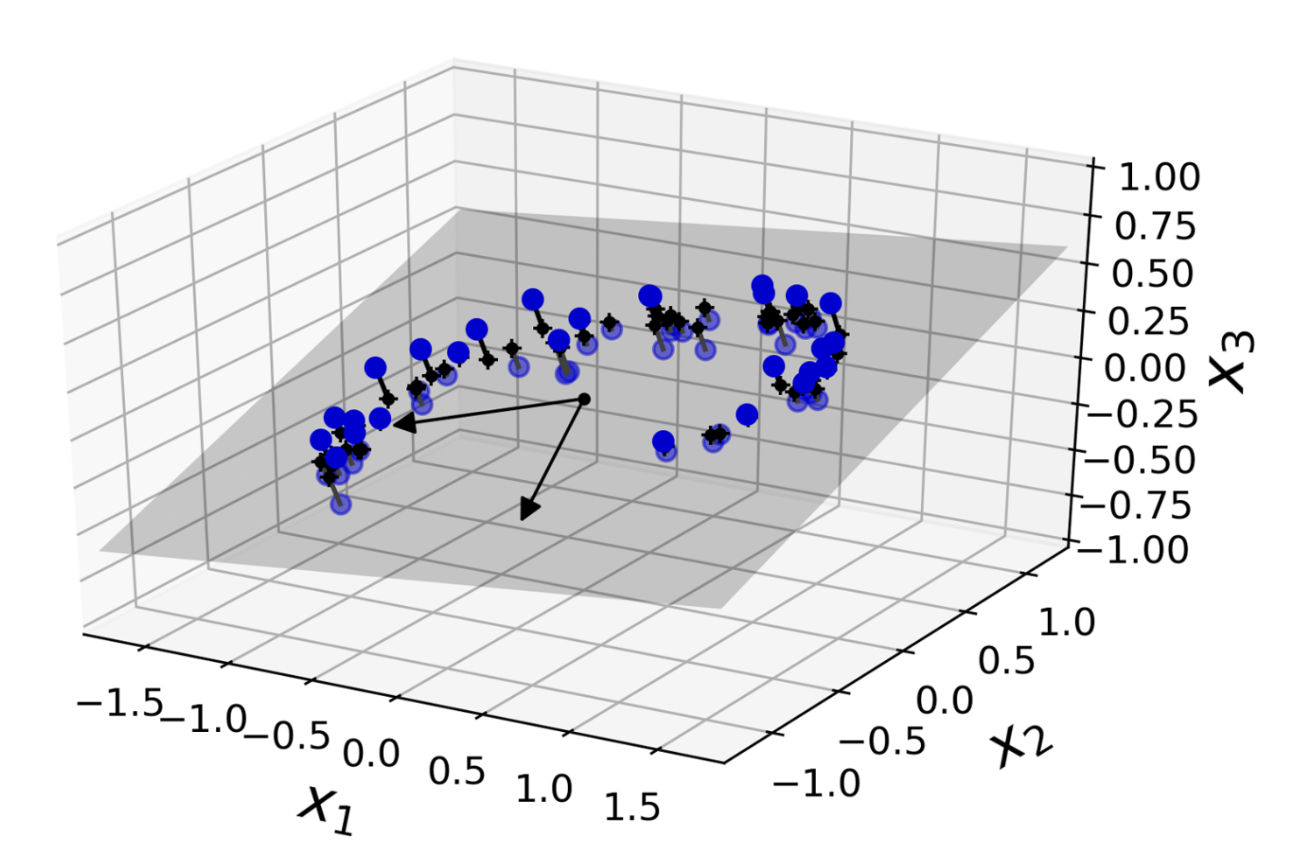

### Projekcja, przykład, redukcja do 2D
W tym przypadku można w miare dokładny sposób zredukować wymiar zachowując odległości między punktami:

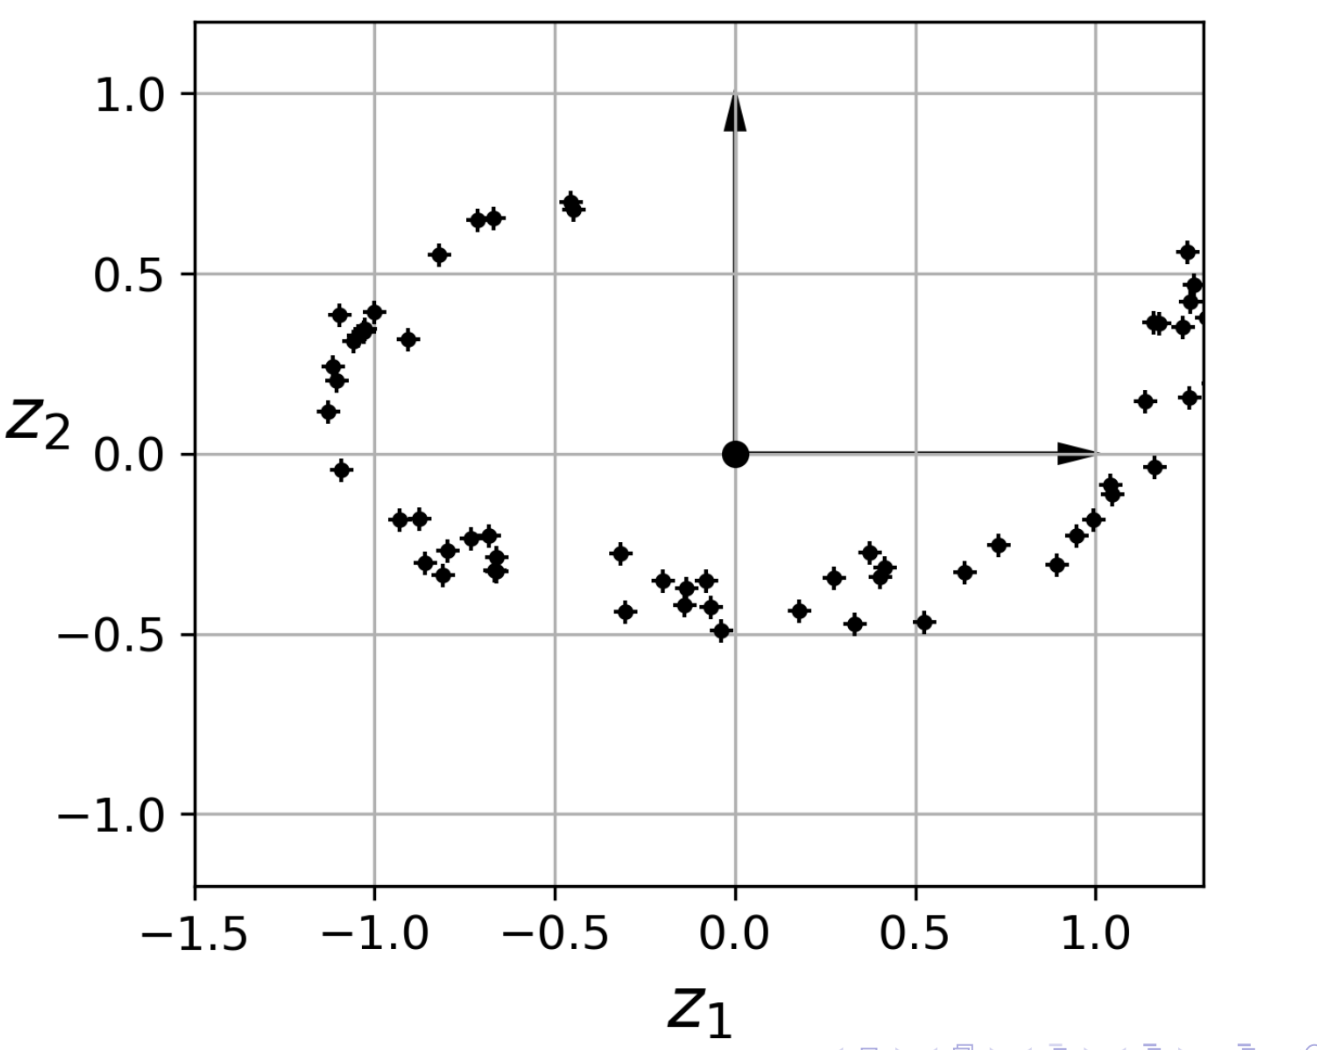

In [39]:
import numpy as np
import matplotlib.pyplot as plt


### Rozmaitość, Manifold
Nie zawsze da się zredukować wymiar bez utraty pewnych zależności

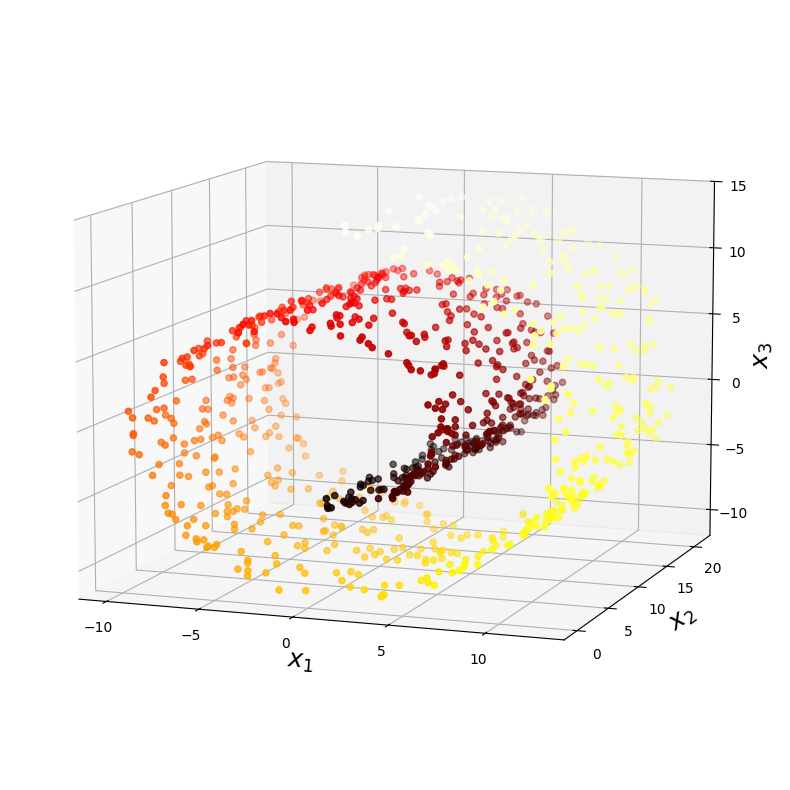

In [40]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

- rozmaitość jest kształtem o niższej wymiarowości
- można go dopasować w przestrzeni o wyższej wymiarowości

### Manifold, przykład

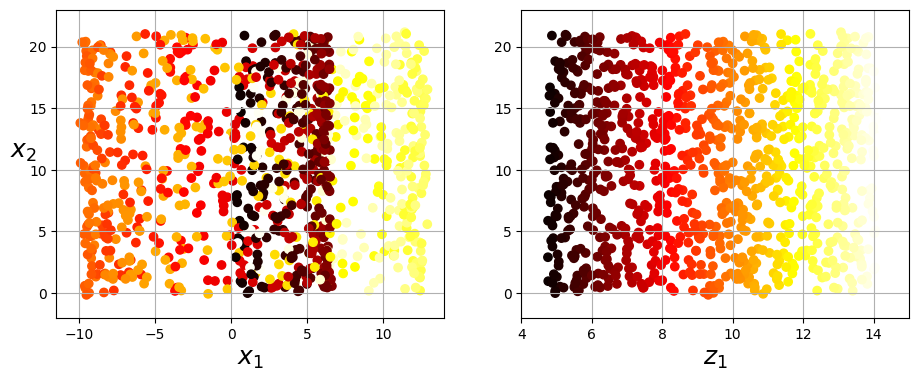

In [41]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.show()

Widzimy że nieważne jakąś podprzestrzeń weźmiemy $x_1$ to nie otrzymamy oczekiwanego wyniku $z_1$.

## Projekcja

### Analiza głównych składowych, Principal Component Analysis
to sposób na znalezienie najlepszych nowych osi, które najlepiej opisują strukturę danych przy mniejszej liczbie zmiennych.
- znajdź hiperpłaszczyznę najbliższej instancji
- rzutuj instancję na w/w hiperpłaszczyznę
- staraj się zachować jak najwięcej zmiennych danych (instancji)
- minimalizacja odległości średniokwadratowej pomiędzy danymi oryginalnmymi i projkecją
- Uwaga: Dane muszą być centrowane

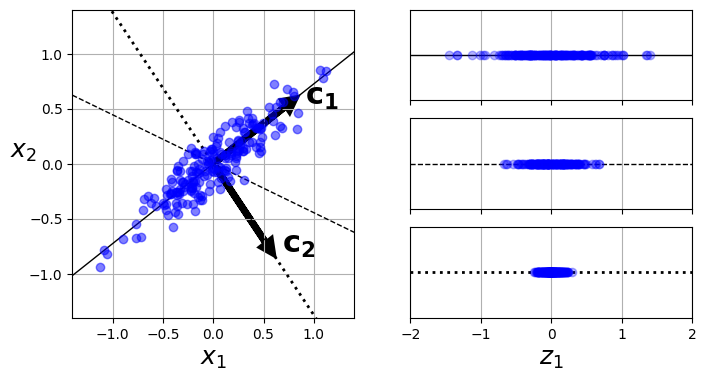

In [42]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

Widizmy, że tutaj płaszczyzna wzdłuż wektora C1 najelpiej zachowuje zależności między danymi.

### PCA, Singular Value Decomposition
- uśrednienie: standaryzacja zmiennych tak, aby średnia każdej zmiennej była 0 (układ odniesienia na środku danych)
- macierz kowariancji
- wartości własne (pokazują rozpiętość naszych danych)
- wektory władne
- sortowanie w kierunku rosnącym wartości własnych (i wektorów własnych)
- wektor własny odpowiadający największej wartości nazywamy **skłądową główną**
Przy redukcji odrzucamy wektory własne o najmniejszych wartościach własnych, czyl takie, które mają najmniejszy wpływ na nasze dane.

[Więcej informacji tutaj](https://builtin.com/data-science/covariance-matrix)

### PCA, SVD, przykład

In [43]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

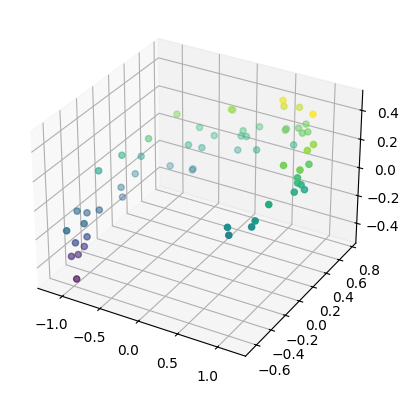

In [44]:
plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=X[:,2])
plt.show()

### PCA Scikit-Learn
- automatcznie centruje dane

In [45]:
from sklearn.decomposition import PCA

# brak redukcji z 3 do 3
pca = PCA(n_components=3)
X3D = pca.fit_transform(X)

print(pca.explained_variance_ratio_) # współczynniki zmienności wymiarów

[0.84248607 0.14631839 0.01119554]


Widzimy że ostatni wymiar ma mały wpływ na rozrzut naszych danych

In [46]:
# redukcja z 3 do 2 wymiarów
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print(X.shape, '--->', X2D.shape)
print(pca.explained_variance_ratio_) # widzimy że ostatni wymiar został usunięty

(60, 3) ---> (60, 2)
[0.84248607 0.14631839]


### PCA, ile wymiarów?

In [47]:
# Jeżeli chcemy zachować 80% zmienności możemy zrobić to tak:

pca2 = PCA(n_components=0.8)
X80 = pca2.fit_transform(X)
print(pca2.explained_variance_ratio_)

[0.84248607]


Zmniejszyliśmy zbiór do 1 wymiaru zachowując **aż 84% zmienności**.

### PCA, transformacja odwrotna
Istnieje możliwość transformacji odwrotnej z powrotem na więcej wymiarów


In [48]:
X_recovered = pca.inverse_transform(X2D)
print(X_recovered.shape, '<---', X2D.shape)

(60, 3) <--- (60, 2)


### Które cechy są najbardziej istotne

In [49]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
c0_important_feature = np.argmax(abs(pca.components_[0]))
print(c0_important_feature)
print(pca.components_[0])

0
[0.93636116 0.29854881 0.18465208]


- należy przeprowadzić dla pozostałych składowych components
- podejście naiwne: co jeżeli więcej niż jeden stary wymiar jest istotny dla nowego wymiaru?

### Efekt uboczny: Kompresja

In [52]:
from sklearn.datasets import fetch_openml
import time

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
start = time.time()
pca = PCA(n_components=0.95, svd_solver='full')
X_reduced = pca.fit_transform(X)
print(pca.n_components)
print(np.sum(pca.explained_variance_ratio_))
print('time: ', time.time()-start)

0.95
0.9503499702078613
time:  18.697895050048828


Czasami pełny algorytm PCA jest może być złożony czasowo:

$O(mn^2) + O(n^3)$, gdzie *m* - instancje, *n* - wymiary

In [53]:
# Możemy również zobaczyć wielkość kompresji jako długość pliku pickle
import pickle
X_recovered = pca.inverse_transform(X_reduced)
print(X.shape, ' : ', len(pickle.dumps(X)))
print(X_reduced.shape, ' : ', len(pickle.dumps(X_reduced)))
print(X_recovered.shape, ' : ', len(pickle.dumps(X_recovered)))

(70000, 784)  :  439040166
(70000, 154)  :  86240165
(70000, 784)  :  439040166


### Kompresja, szybciej, randomized PCA


In [54]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
start = time.time()
pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = pca.fit_transform(X)
print(pca.n_components)
print(np.sum(pca.explained_variance_ratio_))
print('time: ', time.time()-start)

154
0.9499714019421925
time:  12.86057162284851


Widać, że złożoność obliczeniowa jest mniejsza:

$O(md^2) + O(d^3)$
- trzeba podać ile wymiarów $d$
- znajduje **przybliżone** główne składowe

### Kompresja, Incremental PCA
- minibatch
- out-of-core
- praca na strumieniach
- trzeba podać ile wymiarów

In [55]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
start = time.time()
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)
print(pca.n_components)
print(np.sum(pca.explained_variance_ratio_))
print('time: ', time.time()-start)

154
0.9499714019421925
time:  49.871949434280396


### Porównanie, zmienna liczba instancji

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

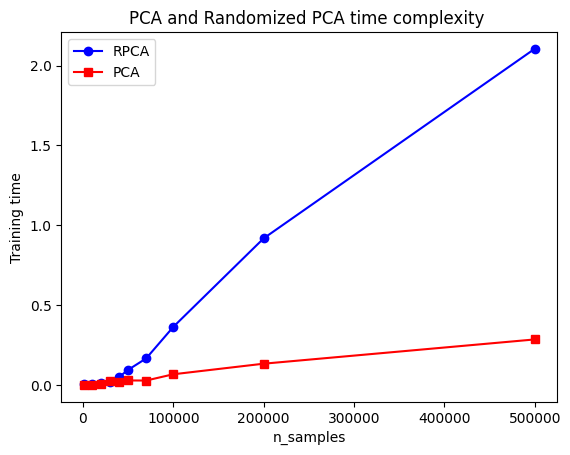

In [56]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

### Porównanie, zmienna liczba cech
- Nie zawsze randomized PCA będzie szybsze
- Gdy jest więcej cech (features) to warto używać normalnego PCA

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

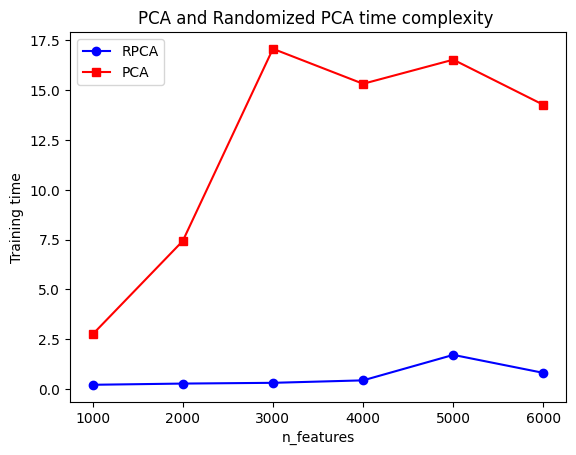

In [57]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

## Rozmaitość, Manifold

### Locally Linear Embedding, LLE
- redukcja danych o schemacie działania podobnym do DBSCAN
- zachowuje lokalne struktury danych ("sąsiedztwa")
- działa na zasadzie: "jeśli punkty były sąsiadami w wysokim wymiarze, mają pozostać sąsiadami w niskim wymiarze",
- W tym przypadku **transformacja odwrotna nie jest trywialna**.

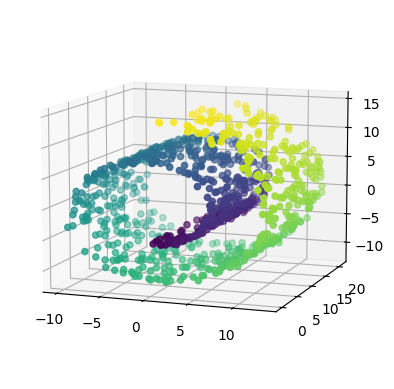

In [58]:
from sklearn.datasets import make_swiss_roll
plt.figure()
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=t)
ax.view_init(10, -70)
plt.show()

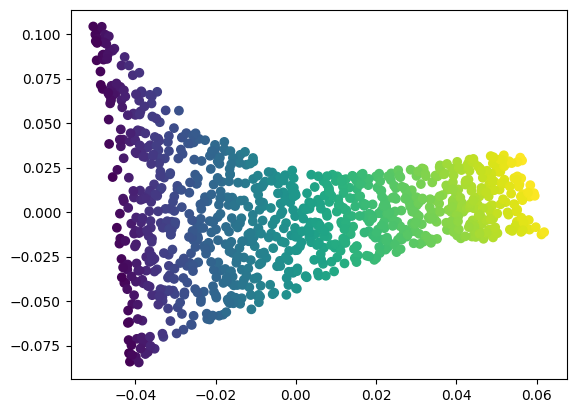

In [59]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)
plt.show()

Widzimy, że nie uzyskaliśmy wyniku idealnego (patrz Manifold, przykład wyrkes $Z_1$), ale jest on już dużo lepszy niż wyniki dawane przez PCA i zachowuje zmienności pomiędzy najbiższymi sąsiadami.
- Lokalne odległości między instancjami są zachowane, globalne już nie

### LLE, algorytm
1. Dla każdej instancji $x^{(i)}$ znajdź $k$ najbliższych sąsiadów
2. Wyznacz $x^{(i)}$ jako wartość funkcji powstałej z regresji liniowej sąsiadów
3. zmapuj $x^{(i)}$ na przestrzeń $d$-wymiarową, zachowując, jak tylko to możliwe w/w zależności liniowe